### Basic Polynomial Regression with Lists

In [1]:
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]]
y = [[1],[4],[9],[16],[25],[36],[49],[64],[81],[100],[121],[144]]

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

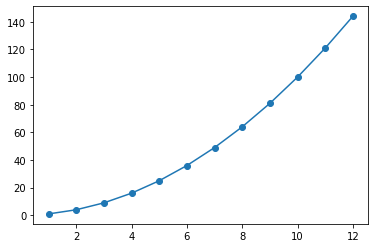

In [4]:
plt.scatter(x, y)
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)))
plt.show() 

In [5]:
#Predict with a new value z = 10

z = lin_reg2.predict(poly_reg.fit_transform([[13]]))[0]
print(z)

[169.]


### Polynomial Regression using Pandas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
data = pd.read_csv('datasets/lr_data.csv')

X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
clf = LinearRegression()
clf.fit(X_poly, Y)
Y_pred = clf.predict(X_poly)

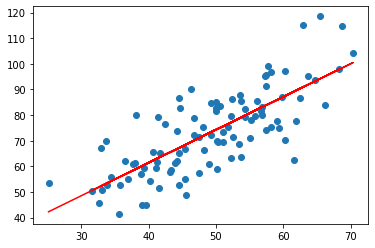

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Polynomial Regression on Images

In [9]:
import os, cv2
import numpy as np
import random, shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
data = []
labels = []
path1 = "datasets/dogs-vs-cats/cats/"
random.shuffle(os.listdir(path1))
for imagepaths in tqdm(os.listdir(path1)[:200]):
    imagepath = path1 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(0) 

path2 = "datasets/dogs-vs-cats/dogs/"
random.shuffle(os.listdir(path2))
for imagepaths in tqdm(os.listdir(path2)[:200]):
    imagepath = path2 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(1) 

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 657.87it/s]


In [11]:
poly_reg = PolynomialFeatures(degree=1)
data = poly_reg.fit_transform(data)

data = np.array(data)
labels = np.array(labels)

In [12]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.15, shuffle=True)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(340, 4097) (60, 4097) (340,) (60,)


In [14]:
clf = LinearRegression()
clf.fit(xtrain, ytrain)

LinearRegression()

In [15]:
from sklearn.metrics import accuracy_score

ypred = clf.predict(xtest)
ypred = (ypred > 0.5)
acc = accuracy_score(ytest, ypred)
print(acc)

0.5166666666666667


[1.] [0.55009956]


Text(0.5, 1.0, 'Predicted Label: Dog')

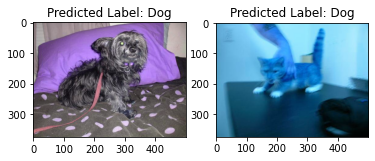

In [16]:
import matplotlib.pyplot as plt

image1 = cv2.imread("datasets/dogs-vs-cats/dogs/dog.0.jpg")
image11 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image11 = cv2.resize(image11,(64,64)).flatten()
image11 = poly_reg.fit_transform([image11])
ypred1 = clf.predict(image11)

if ypred1 > 0.5:
    label1 = 'Predicted Label: Dog'
else:
    label1 = 'Predicted Label: Cat'
    
image2 = cv2.imread("datasets/dogs-vs-cats/cats/cat.0.jpg")
image21 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image21 = cv2.resize(image21,(64,64)).flatten()
image21 = poly_reg.fit_transform([image21])
    
ypred2 = clf.predict([xtest[59]])

if ypred2 > 0.5:
    label2 = 'Predicted Label: Dog'
else:
    label2 = 'Predicted Label: Cat'

print(ypred1, ypred2)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image1)
ax.set_title(label1)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(image2)
ax.set_title(label2)

### Linear Regression for NLP

In [17]:
import os,re
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
df = pd.read_excel("datasets/movie_review.xlsx")
df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",negative
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",negative
2,Why does this movie fall WELL below standards?...,negative
3,Wow and I thought that any Steven Segal movie ...,negative
4,"The story is seen before, but that does'n matt...",negative


In [19]:
X = df["Reviews"][:1200]
y = df["Sentiment"][:1200]

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
print(f"No. of Positive Reviews : {sum(y)}")
print(f"No. of Negative Reviews : {len(y) - sum(y)}")

No. of Positive Reviews : 611
No. of Negative Reviews : 589


In [22]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

<ipython-input-22-5e91e33c57df>:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(1200, 16707)

In [24]:
poly_reg = PolynomialFeatures(degree=1)
X = poly_reg.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = (y_pred > 0.5)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.7666666666666667


In [29]:
def text_pred(text):
    text = cv.transform([text]).toarray()
    text = poly_reg.fit_transform(text)
    pred = model.predict(text)
    preds = 0
    if pred > 0.53:
        preds = 1
    print(pred)
    label = le.inverse_transform([preds])[0]
    return label

In [30]:
text_pred("This movie sucks and the plot twist was already known")

[0.49514012]


'negative'

In [31]:
text_pred("Nice movie and the actions are so good")

[0.56433565]


'positive'